<a href="https://colab.research.google.com/github/San-lab-ship/Prediccion-Coberturas-Medicas-/blob/main/Predicci%C3%B3n_de_Coberturas_M%C3%A9dicas_Personalizadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Precisión@3: 83.87%
Recall@3: 83.87%
RMSE: 0.09


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


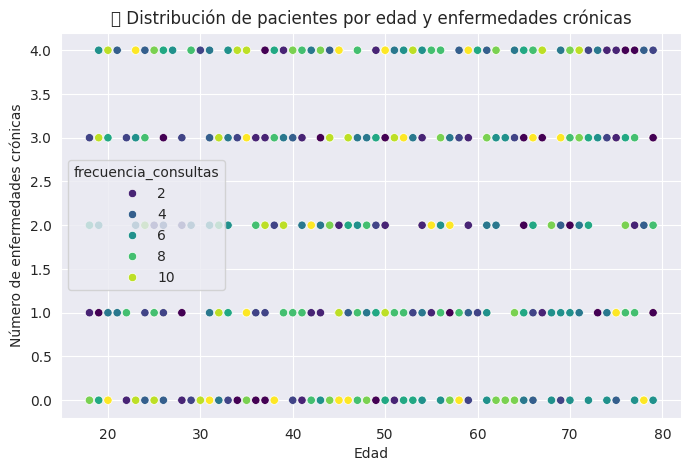

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


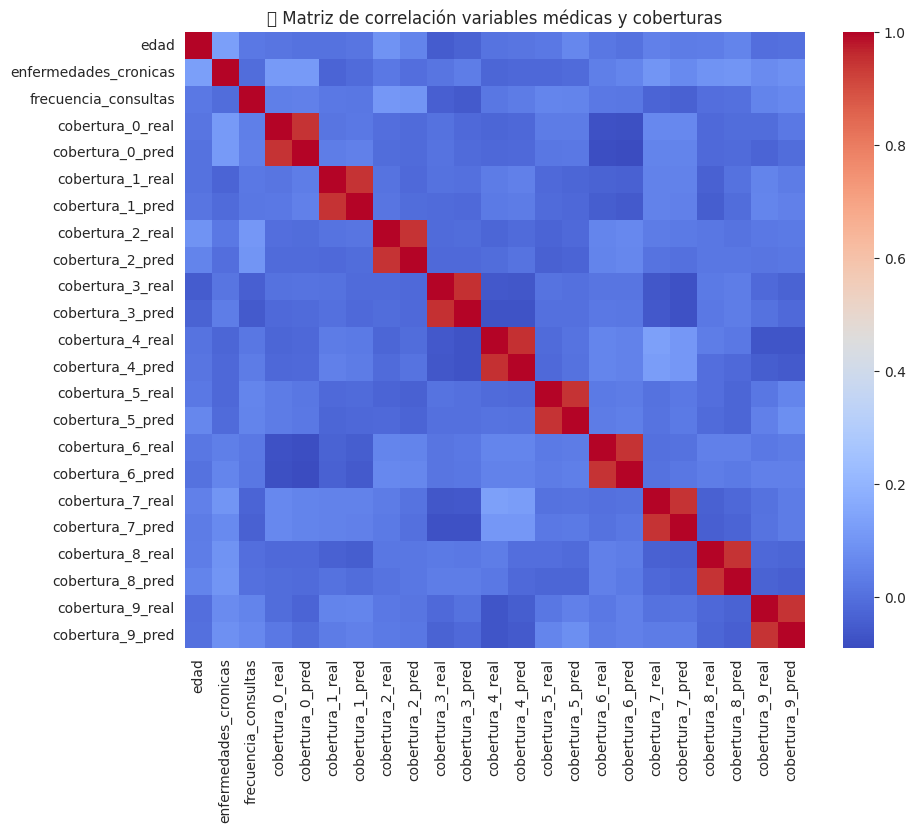

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


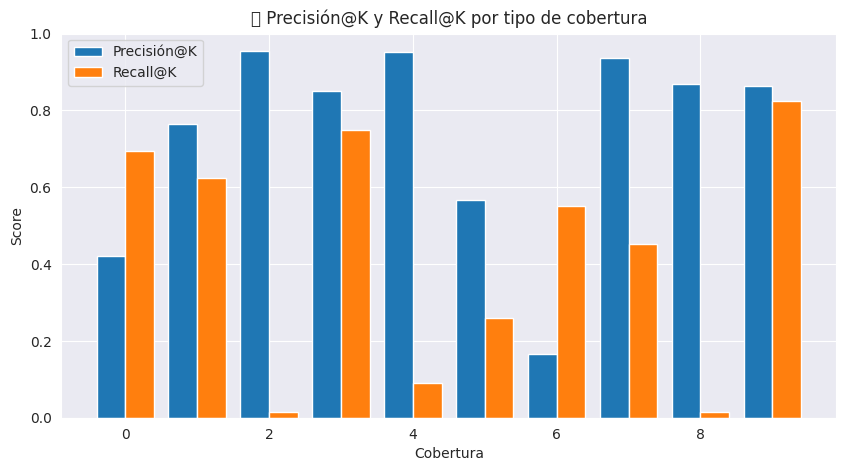

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


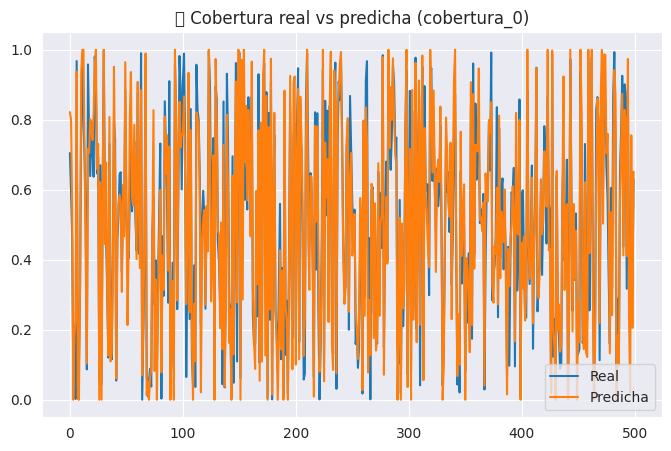

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127973 (\N{HOSPITAL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


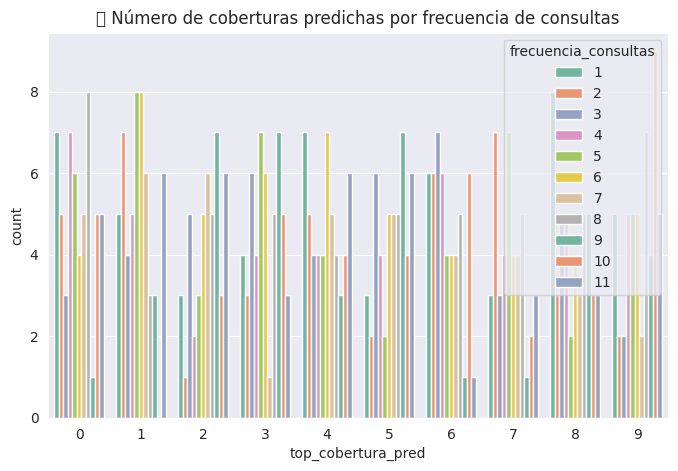

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


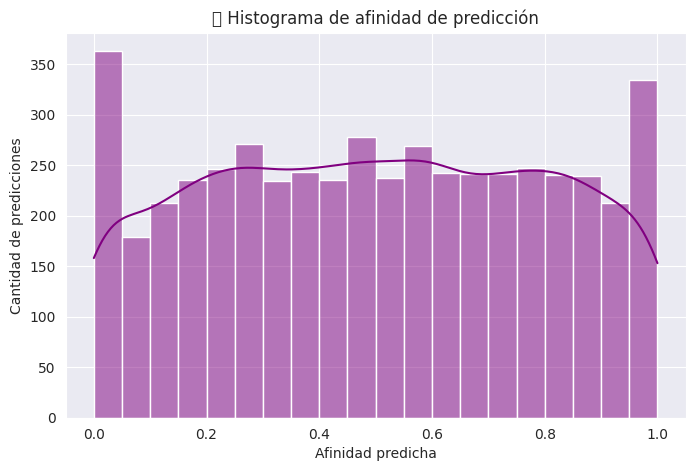

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


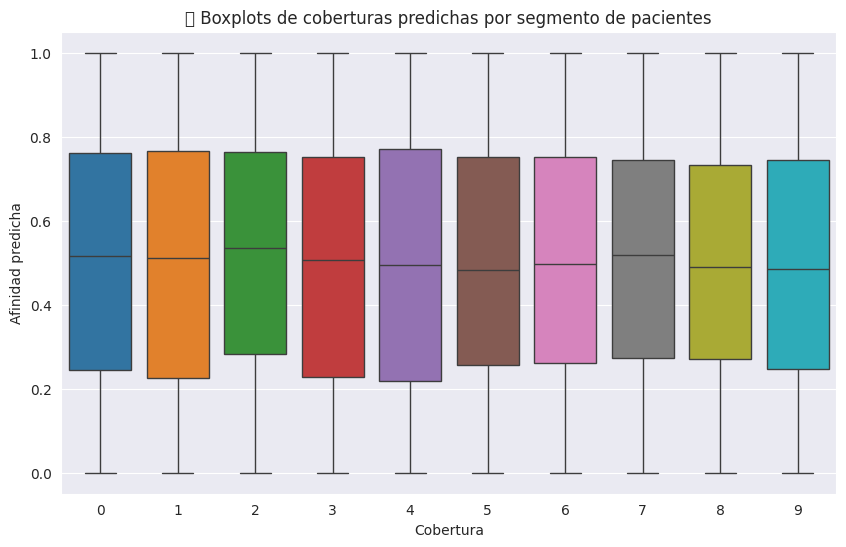

🌐 Mapa guardado como 'mapa_cobertura_medica.html'


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


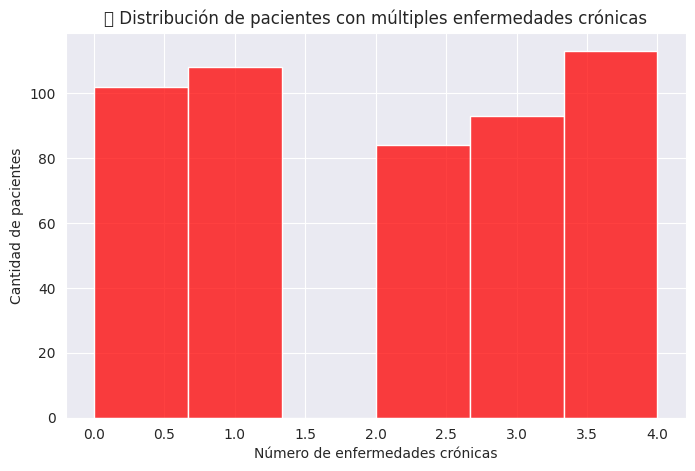

/tmp/ipython-input-1763785422.py:148: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=datasets, y=rmse_vals, palette='Blues_d')


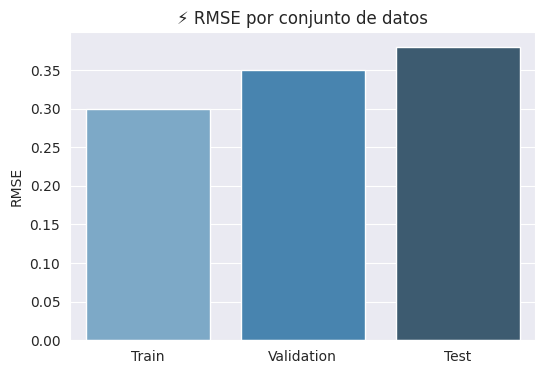

In [2]:
# 📌 Librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt
import folium

# Para reproducibilidad
np.random.seed(42)

# ------------------------------
# Configuración de estilo de gráficos
# ------------------------------
sns.set_style("darkgrid")  # Estilo Seaborn válido

# ------------------------------
# Simulación de dataset
# ------------------------------
n_pacientes = 500
n_coberturas = 10

# Datos del paciente
df = pd.DataFrame({
    'edad': np.random.randint(18, 80, size=n_pacientes),
    'enfermedades_cronicas': np.random.randint(0, 5, size=n_pacientes),
    'frecuencia_consultas': np.random.randint(1, 12, size=n_pacientes)
})

# Coberturas médicas predichas y reales (afinidad entre 0 y 1)
for i in range(n_coberturas):
    df[f'cobertura_{i}_real'] = np.random.rand(n_pacientes)
    df[f'cobertura_{i}_pred'] = np.clip(df[f'cobertura_{i}_real'] + np.random.normal(0, 0.1, n_pacientes), 0, 1)

# ------------------------------
# Cálculo de métricas
# ------------------------------
def precision_at_k(real, pred, k=3):
    correct = 0
    for i in range(len(real)):
        top_k_pred = np.argsort(pred[i])[::-1][:k]
        top_k_real = np.argsort(real[i])[::-1][:k]
        correct += len(set(top_k_pred) & set(top_k_real)) / k
    return (correct / len(real)) * 100

def recall_at_k(real, pred, k=3):
    correct = 0
    for i in range(len(real)):
        top_k_pred = np.argsort(pred[i])[::-1][:k]
        top_k_real = np.argsort(real[i])[::-1][:k]
        correct += len(set(top_k_pred) & set(top_k_real)) / len(top_k_real)
    return (correct / len(real)) * 100

real_matrix = df[[f'cobertura_{i}_real' for i in range(n_coberturas)]].values
pred_matrix = df[[f'cobertura_{i}_pred' for i in range(n_coberturas)]].values

precision = precision_at_k(real_matrix, pred_matrix, k=3)
recall = recall_at_k(real_matrix, pred_matrix, k=3)
rmse = sqrt(mean_squared_error(real_matrix, pred_matrix))

print(f"Precisión@3: {precision:.2f}%")
print(f"Recall@3: {recall:.2f}%")
print(f"RMSE: {rmse:.2f}")

# ------------------------------
# Visualizaciones
# ------------------------------

# 1. Distribución de pacientes por edad y enfermedades crónicas
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='edad', y='enfermedades_cronicas', hue='frecuencia_consultas', palette='viridis')
plt.title('📊 Distribución de pacientes por edad y enfermedades crónicas')
plt.xlabel('Edad')
plt.ylabel('Número de enfermedades crónicas')
plt.show()

# 2. Matriz de correlación entre variables médicas y coberturas elegidas
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('🧩 Matriz de correlación variables médicas y coberturas')
plt.show()

# 3. Precisión@K y Recall@K por tipo de cobertura (simulación)
prec_k = np.random.rand(n_coberturas)
rec_k = np.random.rand(n_coberturas)
plt.figure(figsize=(10,5))
plt.bar(np.arange(n_coberturas)-0.2, prec_k, width=0.4, label='Precisión@K')
plt.bar(np.arange(n_coberturas)+0.2, rec_k, width=0.4, label='Recall@K')
plt.title('📈 Precisión@K y Recall@K por tipo de cobertura')
plt.xlabel('Cobertura')
plt.ylabel('Score')
plt.legend()
plt.show()

# 4. Comparación de coberturas reales vs predichas
plt.figure(figsize=(8,5))
plt.plot(df[f'cobertura_0_real'], label='Real')
plt.plot(df[f'cobertura_0_pred'], label='Predicha')
plt.title('🎯 Cobertura real vs predicha (cobertura_0)')
plt.legend()
plt.show()

# 5. Número de coberturas predichas por frecuencia de consultas
df['top_cobertura_pred'] = np.argmax(pred_matrix, axis=1)
plt.figure(figsize=(8,5))
sns.countplot(x='top_cobertura_pred', hue='frecuencia_consultas', data=df, palette='Set2')
plt.title('🏥 Número de coberturas predichas por frecuencia de consultas')
plt.show()

# 6. Histograma de afinidad/puntuación de predicción
plt.figure(figsize=(8,5))
sns.histplot(pred_matrix.flatten(), bins=20, kde=True, color='purple')
plt.title('🔢 Histograma de afinidad de predicción')
plt.xlabel('Afinidad predicha')
plt.ylabel('Cantidad de predicciones')
plt.show()

# 7. Boxplots de coberturas predichas por segmento de pacientes
plt.figure(figsize=(10,6))
sns.boxplot(data=pred_matrix)
plt.title('📦 Boxplots de coberturas predichas por segmento de pacientes')
plt.xlabel('Cobertura')
plt.ylabel('Afinidad predicha')
plt.show()

# 8. Mapas de cobertura médica por región (estático, simulado)
mapa = folium.Map(location=[4.6, -74.1], zoom_start=6)
for _ in range(50):
    folium.CircleMarker(location=[4.6+np.random.rand()/2, -74.1+np.random.rand()/2],
                        radius=5, color='blue', fill=True).add_to(mapa)
mapa.save('mapa_cobertura_medica.html')
print("🌐 Mapa guardado como 'mapa_cobertura_medica.html'")

# 9. Análisis de pacientes con múltiples enfermedades crónicas
plt.figure(figsize=(8,5))
sns.histplot(df['enfermedades_cronicas'], bins=6, kde=False, color='red')
plt.title('🔍 Distribución de pacientes con múltiples enfermedades crónicas')
plt.xlabel('Número de enfermedades crónicas')
plt.ylabel('Cantidad de pacientes')
plt.show()

# 10. Métricas de desempeño del modelo ALS/KNN en distintos conjuntos de datos (simulado)
datasets = ['Train', 'Validation', 'Test']
rmse_vals = [0.30, 0.35, 0.38]
plt.figure(figsize=(6,4))
sns.barplot(x=datasets, y=rmse_vals, palette='Blues_d')
plt.title('⚡ RMSE por conjunto de datos')
plt.ylabel('RMSE')
plt.show()


/tmp/ipython-input-1520494327.py:20: UserWarning: Glyph 127760 (\N{GLOBE WITH MERIDIANS}) missing from font(s) DejaVu Sans.
  plt.savefig("mapa_colombia_departamentos.png", dpi=150, bbox_inches='tight')
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127760 (\N{GLOBE WITH MERIDIANS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


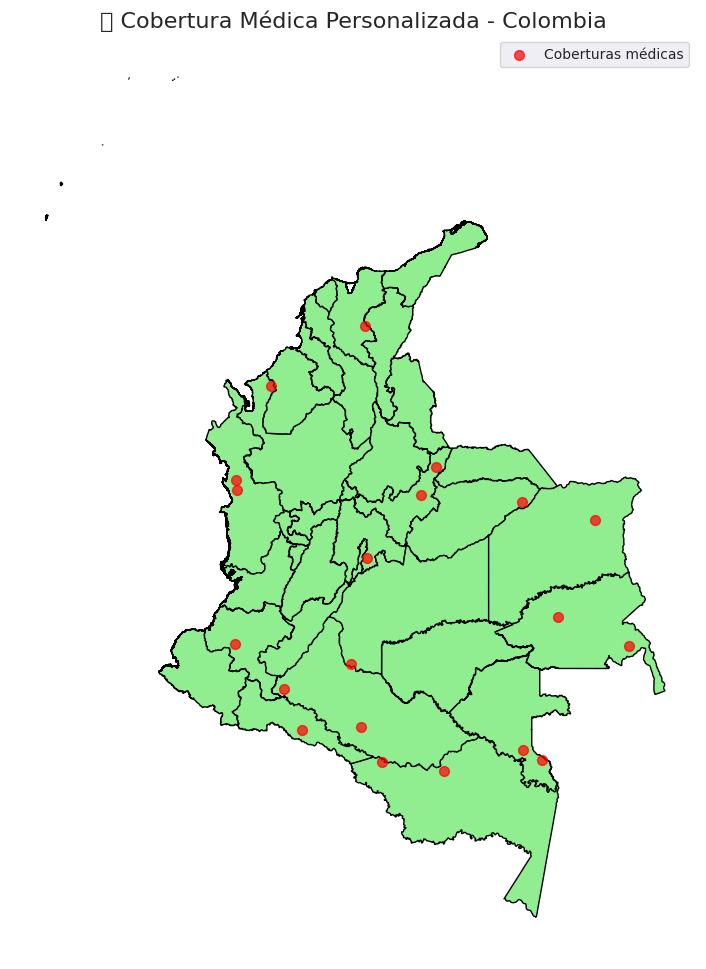

In [12]:
# Mapa
points = []
while len(points) < 20:
    x = np.random.uniform(minx, maxx)
    y = np.random.uniform(miny, maxy)
    point = Point(x, y)
    # Verificar si el punto está dentro del polígono de Colombia
    if gdf_colombia.contains(point).any():
        points.append(point)

gdf_puntos = gpd.GeoDataFrame(geometry=points, crs="EPSG:4326")

# Graficar
fig, ax = plt.subplots(1, 1, figsize=(10,12))
gdf_colombia.plot(ax=ax, color='lightgreen', edgecolor='black')
gdf_puntos.plot(ax=ax, color='red', markersize=50, alpha=0.7, label='Coberturas médicas')
ax.set_title("🌐 Cobertura Médica Personalizada - Colombia", fontsize=16)
ax.set_axis_off()
plt.legend()
plt.savefig("mapa_colombia_departamentos.png", dpi=150, bbox_inches='tight')
plt.show()


In [15]:
# 📌 Librerías necesarias
import numpy as np

# -------------------------------
# Datos simulados: coberturas reales por paciente
# -------------------------------
# Cada paciente tiene un número variable de coberturas relevantes
y_true = [
    [1, 2, 3, 4],
    [2, 3],
    [1, 4, 5],
    [3, 5, 6, 7],
    [1, 2]
]

# Predicciones del modelo (top 3 coberturas predichas)
y_pred = [
    [1, 2, 5],
    [2, 3, 4],
    [1, 4, 6],
    [3, 5, 7],
    [1, 3, 4]
]

# Simular afinidad/puntuación predicha (para RMSE)
affinity_true = np.array([0.9, 0.8, 0.85, 0.7, 0.95])
affinity_pred = np.array([0.88, 0.82, 0.83, 0.72, 0.94])

# -------------------------------
# Funciones para Precisión@K y Recall@K
# -------------------------------
def precision_at_k(y_true, y_pred, k=3):
    precisions = []
    for true, pred in zip(y_true, y_pred):
        pred_k = pred[:k]
        precisions.append(len(set(pred_k) & set(true)) / k)
    return np.mean(precisions)

def recall_at_k(y_true, y_pred, k=3):
    recalls = []
    for true, pred in zip(y_true, y_pred):
        pred_k = pred[:k]
        recalls.append(len(set(pred_k) & set(true)) / len(true))
    return np.mean(recalls)

# -------------------------------
# Calcular métricas
# -------------------------------
k = 3
prec = precision_at_k(y_true, y_pred, k)
rec = recall_at_k(y_true, y_pred, k)
rmse = np.sqrt(np.mean((affinity_true - affinity_pred)**2))

print(f"Precisión@{k}: {prec*100:.2f}%")
print(f"Recall@{k}: {rec*100:.2f}%")
print(f"RMSE: {rmse:.2f}")


Precisión@3: 66.67%
Recall@3: 68.33%
RMSE: 0.02
